# SLR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resources/08-Linear-Regression-Models/Advertising.csv')
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [3]:
df['Total'] = df[['TV', 'radio',  'newspaper']].sum(1)
df.head(5)

,TV,radio,newspaper,sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Total', ylabel='sales'>

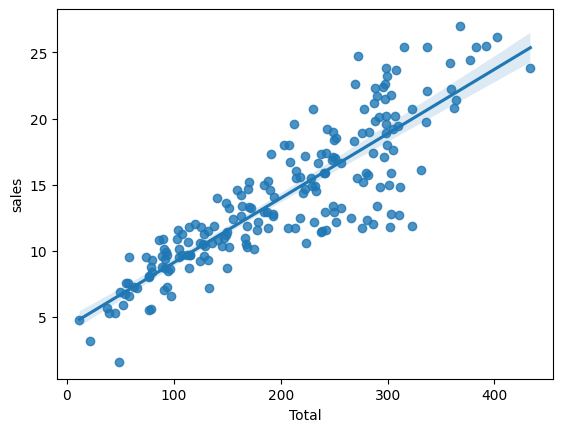

In [4]:
sns.regplot(x=df['Total'], y=df['sales'])

In [5]:
x = df['Total']
y = df['sales']

In [6]:
# y = mx+b
# y = B1x + B0
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [7]:
np.polyfit(x, y, deg=1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend = np.linspace(0, 500, 100)

In [9]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

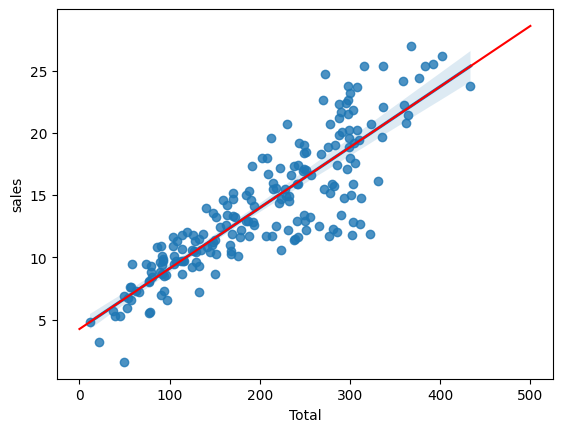

In [10]:
sns.regplot(x=df['Total'], y=df['sales'])
plt.plot(potential_spend, predicted_sales, c='r')

In [11]:
spend=200
predict_sales = 0.04868788*spend + 4.24302822
predict_sales

13.98060422

In [12]:
np.polyfit(x, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [13]:
pot_spend=np.linspace(0, 500, 100)
pred_sales=3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

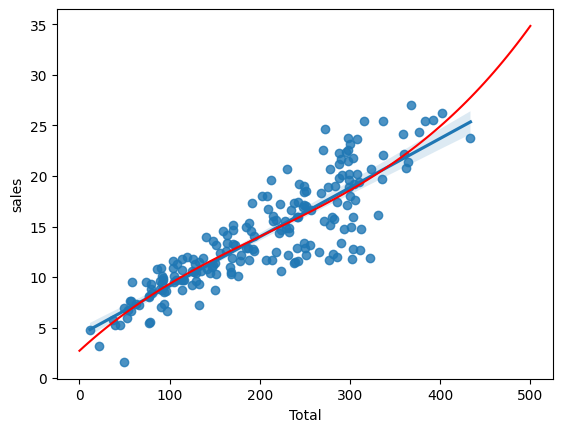

In [14]:
sns.regplot(x=df['Total'], y=df['sales'])
plt.plot(pot_spend, pred_sales, c='r')

# Train Test Split

In [15]:
df = pd.read_csv('Resources/08-Linear-Regression-Models/Advertising.csv')

In [16]:
df.head(0)

,TV,radio,newspaper,sales


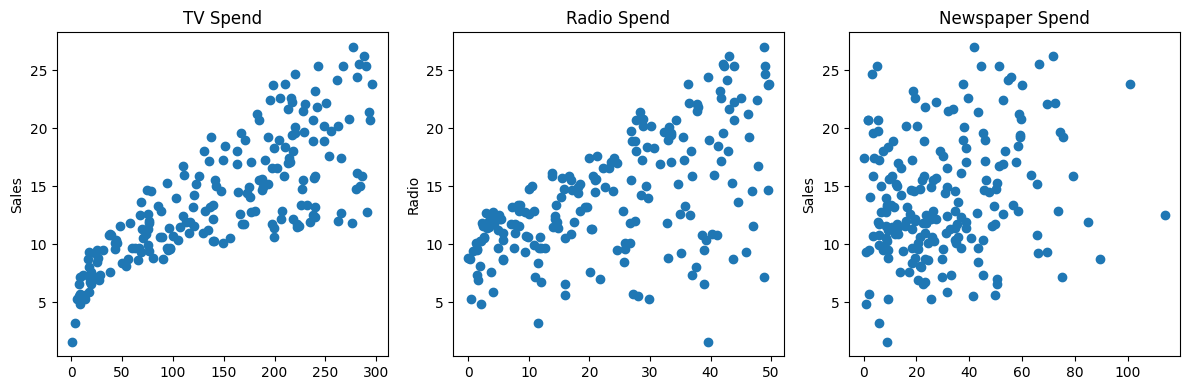

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].plot(df['TV'], df['sales'], 'o')
ax[0].set_ylabel('Sales')
ax[0].set_title('TV Spend')

ax[1].plot(df['radio'], df['sales'], 'o')
ax[1].set_ylabel('Radio')
ax[1].set_title('Radio Spend')

ax[2].plot(df['newspaper'], df['sales'], 'o')
ax[2].set_ylabel('Sales')
ax[2].set_title('Newspaper Spend')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('sales', axis=1)
y = df['sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression 

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
df['sales'].mean()

14.0225

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

<Axes: xlabel='sales', ylabel='Count'>

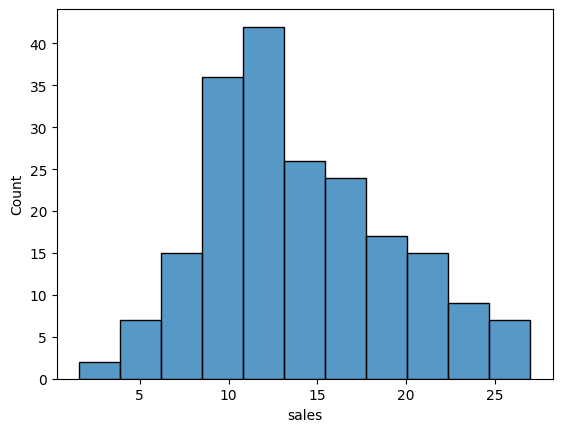

In [27]:
sns.histplot(x=df['sales'])

In [28]:
mean_absolute_error(y_test, y_pred)

1.213745773614481

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.516151937599388

In [30]:
root_mean_squared_error(y_test, y_pred)

1.516151937599388

# Residuals Plot

In [31]:
test_residuals = y_test - y_pred

In [32]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

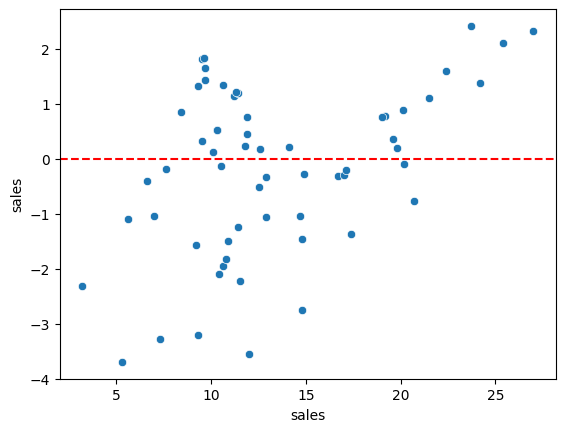

In [33]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, c='r', ls='--')

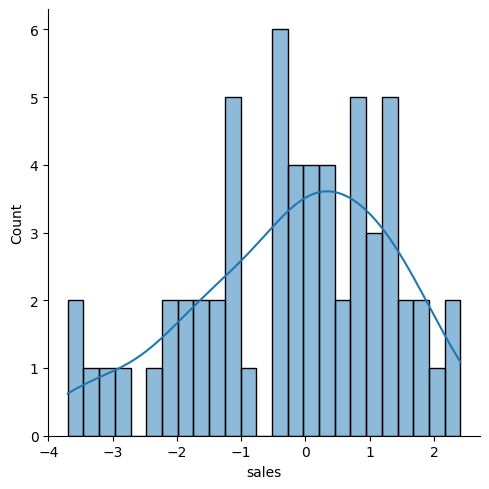

In [34]:
sns.displot(test_residuals,  kde=True, bins=25)

In [35]:
lr.fit(X,y)

LinearRegression()

In [36]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
from joblib import dump, load

In [38]:
dump(lr, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [39]:
load_model = load('final_sales_model.joblib')

In [40]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [41]:
X.shape

(200, 3)

In [42]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149, 22, 12]]

In [43]:
load_model.predict(campaign)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [44]:
y_pred = load_model.predict(X)

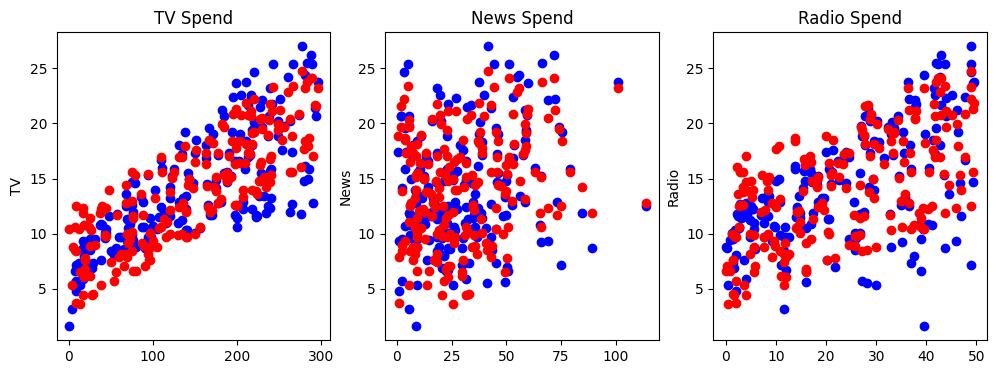

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].plot(df['TV'], df['sales'], 'bo')
ax[0].plot(df['TV'], y_pred, 'ro')
ax[0].set_ylabel('TV')
ax[0].set_title('TV Spend')

ax[1].plot(df['newspaper'], df['sales'], 'bo')
ax[1].plot(df['newspaper'], y_pred, 'ro')
ax[1].set_ylabel('News')
ax[1].set_title('News Spend')

ax[2].plot(df['radio'], df['sales'], 'bo')
ax[2].plot(df['radio'], y_pred, 'ro')
ax[2].set_ylabel('Radio')
ax[2].set_title('Radio Spend')

plt.show()

# Polynomial Features

In [53]:
from sklearn.preprocessing  import PolynomialFeatures

In [52]:
X = df.drop('sales', axis=1)
y = df.sales

In [54]:
pc = PolynomialFeatures(2, include_bias=False)

In [55]:
pc.fit(X)

PolynomialFeatures(include_bias=False)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(pc_features, y, test_size=0.3, random_state=101)

In [59]:
pc_features = pc.transform(X)

In [111]:
lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
pc_predict = lr.predict(X_test)

In [65]:
mean_absolute_error(y_test, pc_predict)

0.48967980448035886

In [66]:
mean_squared_error(y_test, pc_predict)

0.44175055104033895

In [67]:
root_mean_squared_error(y_test, pc_predict)

0.6646431757269

# Errors, higher degree of polynomial

In [71]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    pc = PolynomialFeatures(degree=d, include_bias=False)
    pc_features = pc.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pc_features, y, test_size=0.3, random_state=101)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    train_pred =  lr.predict(X_train)
    test_pred = lr.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, train_pred)
    test_rmse = root_mean_squared_error(y_test, test_pred)

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [72]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.19433503220621592,
 5.421511117920281,
 0.14355942587195927,
 0.1722865587132674]

In [73]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.326108924477438,
 1379.5706760334367,
 4506.544135102732,
 97547.21710738621]

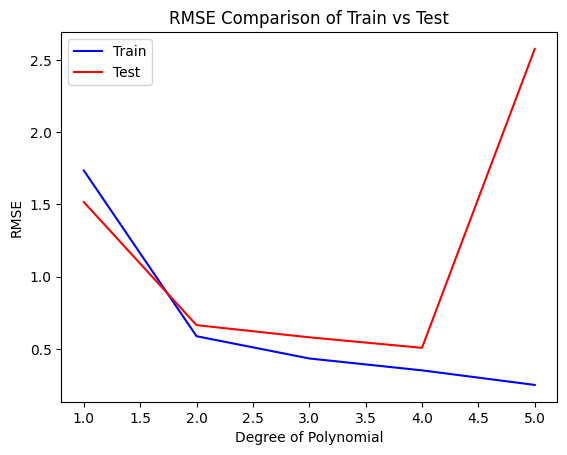

In [89]:
plt.plot(range(1,6),train_rmse_errors[:5], label='Train', color ='b') 
plt.plot(range(1, 6), test_rmse_errors[:5], label = 'Test', color='r')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.title('RMSE Comparison of Train vs Test')
plt.legend()
plt.show()

In [93]:
final_poly = PolynomialFeatures(3, include_bias=False)

In [91]:
final_lr = LinearRegression()

In [94]:
poly_fit = final_poly.fit_transform(X)
final_lr.fit(poly_fit, y)

LinearRegression()

In [95]:
dump(final_lr, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [96]:
dump(final_poly, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [97]:
load_poly = load('final_poly_converter.joblib')
load_model = load('final_poly_model.joblib')

In [98]:
campaign = [[149, 22, 12]]

In [100]:
new_campaign = load_poly.fit_transform(campaign)

In [101]:
load_model.predict(new_campaign)

array([14.64501014])

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
pc = PolynomialFeatures(degree=3, include_bias=False)

In [106]:
poly_features = pc.fit_transform(X)

In [109]:
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [113]:
X_train.shape

(140, 19)

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
ss = StandardScaler()

In [116]:
ss.fit(X_train)

StandardScaler()

In [117]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [119]:
from sklearn.linear_model import Ridge

In [120]:
ridge_model=Ridge(alpha=10)

In [121]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [122]:
y_predict = ridge_model.predict(X_test)

In [123]:
mae = mean_absolute_error(y_test, y_predict)

In [125]:
rmse = root_mean_squared_error(y_test, y_predict)

In [126]:
print(mae, rmse)

0.5774404204714166 0.8946386461319648


In [128]:
from sklearn.linear_model import RidgeCV

In [131]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0) )

In [132]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV()

In [133]:
ridge_cv_model.alpha_

0.1

In [156]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

# Method 1: Using get_scorer_names (if available)
try:
    from sklearn.metrics import get_scorer_names
    print("Available scorers using get_scorer_names():")
    print(get_scorer_names())
except ImportError:
    print("get_scorer_names is not available in this version of scikit-learn.")

# Method 2: Directly accessing SCORERS
try:
    from sklearn.metrics._scorer import SCORERS
    print("Available scorers using SCORERS.keys():")
    print(SCORERS.keys())
except ImportError:
    print("SCORERS dictionary is not available in this version of scikit-learn.")

# Method 3: Accessing SCORERS from sklearn.metrics directly
try:
    from sklearn.metrics import SCORERS
    print("Available scorers using SCORERS from sklearn.metrics:")
    print(SCORERS.keys())
except ImportError:
    print("SCORERS is not directly available in sklearn.metrics in this version of scikit-learn.")


scikit-learn version: 1.4.1.post1
Available scorers using get_scorer_names():
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', '

In [157]:
ridge_cv_model = RidgeCV(alphas=(0, 0.1, 0.2, 0.5, 1.0, 10.0), scoring = 'neg_mean_absolute_error' )

In [158]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [159]:
ridge_cv_model.alpha_

0.1

In [160]:
y_pred = ridge_cv_model.predict(X_test)

In [161]:
mae=mean_absolute_error(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)

In [162]:
print(mae,rmse)

0.42737748843375084 0.6180719926926787


In [163]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [164]:
ridge_cv_model.best_score_

-0.37492233402929614

# Lasso Regression

In [166]:
from sklearn.linear_model import LassoCV

In [1]:
# help(LassoCV)

In [182]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [183]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [184]:
lasso_cv_model.alpha_

0.004943070909225831

In [185]:
y_pred = lasso_cv_model.predict(X_test)

In [186]:
mae = mean_absolute_error(y_test, y_pred)
rmse= root_mean_squared_error(y_test, y_pred)

In [187]:
print(mae, rmse)

0.4335034618590074 0.6063140748984036


In [188]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# Elastic Net

In [189]:
from sklearn.linear_model import ElasticNetCV

In [190]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, 
                               n_alphas=100, max_iter=1000000)

In [191]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [192]:
elastic_cv_model.l1_ratio_

1.0

In [195]:
elastic_cv_model.alpha_

0.004943070909225831

In [196]:
y_pred = elastic_cv_model.predict(X_test)

In [197]:
print(mae, rmse)

0.4335034618590074 0.6063140748984036


In [198]:
df.shape

(200, 4)